In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
# Importation de train_text
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler



In [45]:
data=pd.read_excel('Coeur.xlsx')

In [3]:
#2. Faites une copie de l’objet “data” dans un nouvel objet appelé “df”.
df = data.copy()
df.head()

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [47]:
df.describe()

,AGE,SEXE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# verifier les doublons

In [5]:
df.duplicated().sum()

0

In [6]:
# df.drop_duplicates()   (suppression des doublons)

# Verification de constantes

In [7]:
import math
b = math.nan
print(np.isnan(b))


True


# Verification de donnée manquantes

In [46]:
df.isnull().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

# Normalisation de toutes les variables quantitatives


In [15]:
#ecart type  
# df_quant[col].std()

In [43]:
normaliser = StandardScaler()
df_quant[df_quant.columns] = normaliser.fit_transform(df_quant)
df_quant

ValueError: could not convert string to float: 'CŒUR'

# encodage de toutes les variables qualitatives

In [11]:
def recoder(serie):
  return serie.astype('category').cat.codes


In [12]:
def recoder_df(data):
    for col in data.select_dtypes('object').columns:
        data[col]=recoder(data[col])
        return data
 

In [13]:
recoder_df(df)

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,1,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,0,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,1,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,0,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,1,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,1,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,1,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,0,AA,130,236,0,LVH,174,Non,0.0,Plat,1


# 8-separer la variable cible coeur des autres variables de df

In [14]:
X=df.drop(['CŒUR'], axis=1)
y=df['CŒUR']

### 9. En utilisant la fonction train_test_split du module model_selection du package sklearn, subdiviser vos données X et Y en respectivement X_train, X_test et Y_train, Y_test. X_train et Y_train doivent contenir respectivement 80 % des données de X et Y.

In [29]:
X_train, X_test, y_train, y_test= train_test_split (X,y,test_size =0.2 ,random_state = 1)

TypeError: Singleton array array(3) cannot be considered a valid collection.

In [ ]:
print('train_set', X_train.shape)
print('test_set', X_test.shape)

# 10. En utilisant la classe LogisticRegression du module linear_model du package sklearn, construisez un modèle de régression logistique en utilisant les données X_train et Y_train et la méthode fit de la classe LogisticRegression.

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

NameError: name 'X_train' is not defined

# 11- Affichage de la probabilité d'appartenance à chacune des classes de la variable coeur


In [30]:
logReg.predict_proba(X_test[:5])

NameError: name 'X_test' is not defined

# 12- Prediction de la classe d'appartenance de chaque individu de X_test


In [37]:
y_pred= logReg.predict(X_test)
y_pred


NameError: name 'X_test' is not defined

#  confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix= confusion_matrix(y_pred, y_test)

In [ ]:
matrix

# accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accur= accuracy_score(y_pred, y_test)
accur

# recall_score

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall= recall_score(y_pred, y_test)
recall

#  precision_score 

In [35]:
from sklearn.metrics import precision_score

In [36]:
pre= precision_score(y_pred, y_test)
pre

NameError: name 'y_pred' is not defined

In [33]:
# Appliquer la regression logistique sur notre base de donnée
Classifier=LogisticRegression()
Classifier.fit(X_train , y_train)

NameError: name 'X_train' is not defined

In [34]:
#Enregistrer le modèle
pickle.dump(Classifier, open('model.pkl','wb'))

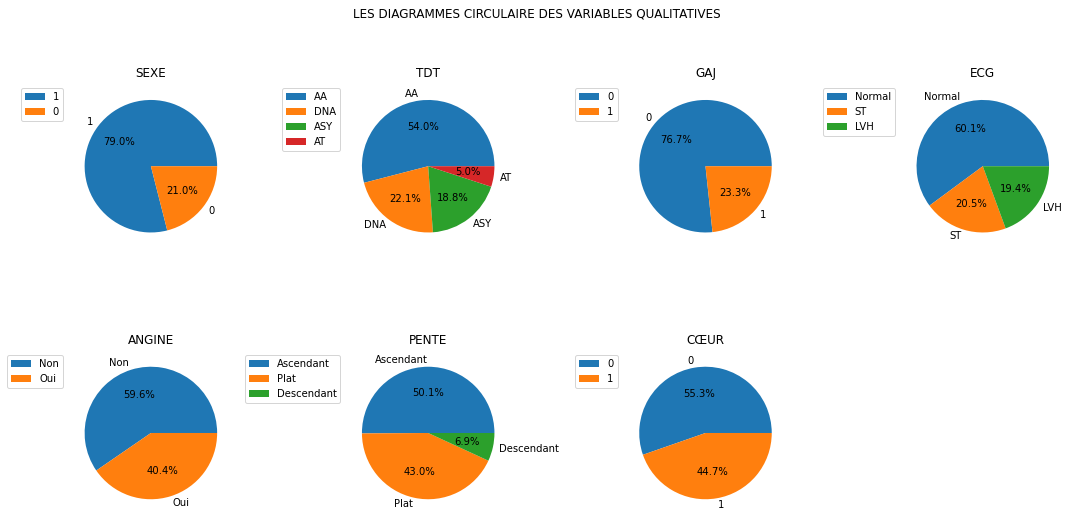

In [20]:
# representation graphique des variables qualitatives

qual = ['SEXE', 'TDT', 'GAJ', 'ECG', 'ANGINE', 'PENTE', 'CŒUR'] # la liste des variables qualitatives

plt.figure(tight_layout = True, figsize = (15,8))
plt.suptitle("LES DIAGRAMMES CIRCULAIRE DES VARIABLES QUALITATIVES")
for y,x in enumerate(qual):
    eff = df[x].value_counts()
    modalite = df[x].unique()
    plt.subplot(2,4,y+1)
    plt.pie(eff, labels = modalite, autopct = '%1.1f%%')
    plt.legend(bbox_to_anchor = (0, 1))
    plt.title(f"{qual[y]}")
plt.show()

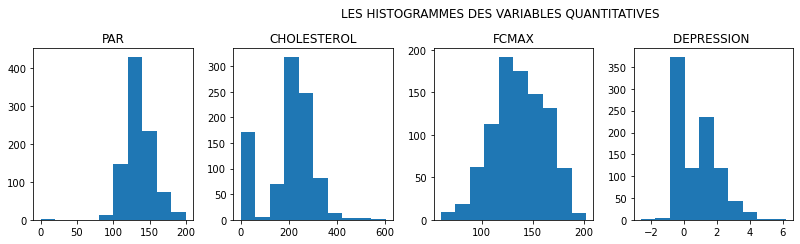

In [24]:
quant = ['PAR', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION ']

plt.figure(tight_layout = True, figsize = (14, 6))
plt.suptitle("LES HISTOGRAMMES DES VARIABLES QUANTITATIVES")
for y,x in enumerate(quant):
    plt.subplot(2,5,y+1)
    plt.hist(df[x])
    plt.title(f"{quant[y]}")
plt.show()